In [12]:
import numpy as np
def X(v, t, r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v0):
    N = v0[0]
    dxdt = r*N*(1-N/K) - sigma_1*N + sigma_2*v0[1] - beta_1*N*v0[2]
    return dxdt

In [13]:
def Y(v, t, s, L, sigma_1, sigma_2, beta_0, beta_1, beta_2, v0):
    N = v0[1]
    dydt = s*N*(1-N/L) + sigma_1*v0[0] - sigma_2*N
    return dydt

In [14]:
def Z(v, t, r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v0):
    N = v0[2]
    dzdt = 1*N*(1-N/100) + beta_2*N*v0[0] - beta_0*N
    return dzdt

In [15]:
B = 10

r = 4
K = 400

s = 3.5
L = 500

sigma_1 = 2.5
sigma_2 = 1.5
beta_0 = 3
beta_1 = 2
beta_2 = 1

t = np.linspace(0, 20, B)

v = [0] * B

v0 = [1, 1, 1]

In [16]:
from scipy.integrate import odeint
X_sol = odeint(X, v, t, args=(r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v0))
Y_sol = odeint(Y, v, t, args=(r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v0))
Z_sol = odeint(Z, v, t, args=(r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v0))


RuntimeError: The size of the array returned by func (1) does not match the size of y0 (10).

In [17]:
v[0] = v0
for i in range(B-1):
    v[i+1] = [X(1, t, r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v[i]),
            Y(1, t, r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v[i]),
            Z(1, t, r, K, sigma_1, sigma_2, beta_0, beta_1, beta_2, v[i])]

print(v)

[[1, 1, 1], [0.9900000000000002, 4.99, -1.01], [10.959999000000002, 14.700999000000003, 1.0098989999999999], [15.153297158997997, 61.99130128402, 9.03849507019899], [-160.5053298210895, 154.4322817586836, 118.06906759712567], [37634.70009158696, -253.67591664794915, -19326.255818771966], [1440568048.291966, 92809.04573047574, -731034230.7608589], [2.0854567492269724e+18, 3515516953.650225, -1.0584486640451619e+18], [4.3712065217575465e+36, 5.090053287342202e+18, -2.218552045887445e+36], [1.9204423879124938e+73, 1.0668929879714036e+37, -9.746968903644861e+72]]


In [18]:
V = np.transpose(v)
print(V)

[[ 1.00000000e+00  9.90000000e-01  1.09599990e+01  1.51532972e+01
  -1.60505330e+02  3.76347001e+04  1.44056805e+09  2.08545675e+18
   4.37120652e+36  1.92044239e+73]
 [ 1.00000000e+00  4.99000000e+00  1.47009990e+01  6.19913013e+01
   1.54432282e+02 -2.53675917e+02  9.28090457e+04  3.51551695e+09
   5.09005329e+18  1.06689299e+37]
 [ 1.00000000e+00 -1.01000000e+00  1.00989900e+00  9.03849507e+00
   1.18069068e+02 -1.93262558e+04 -7.31034231e+08 -1.05844866e+18
  -2.21855205e+36 -9.74696890e+72]]


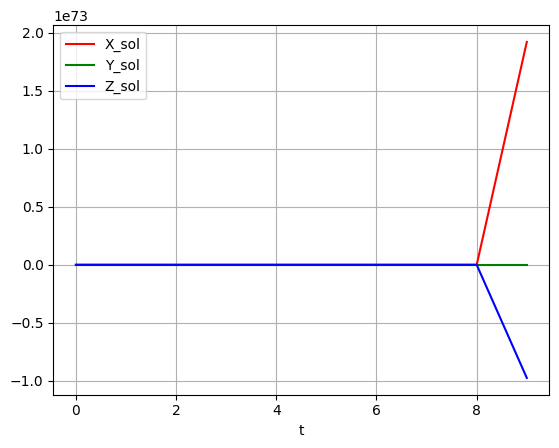

In [19]:
import matplotlib.pyplot as plt
plt.plot(V[0], 'r', label='X_sol')
plt.plot(V[1], 'g', label='Y_sol')
plt.plot(V[2], 'b', label='Z_sol')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [20]:
from scipy.integrate import odeint

import matplotlib.pyplot as plt

import numpy as np

In [39]:
def pend(y, t, r, K):
    N = y
    dydt = r*N*(1-N/K)
    return dydt

r = 0.1
K = 1000

y0 = [10, 200, 700]

t = np.linspace(0, 200, 200)

from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(r, K))

analit = (y0[0] * np.e ** (r*t)) / (1 - y0[0]/K + (y0[0] * np.e ** (r*t)) / K)

In [40]:
def Xplicit_Y(y, tau, r, K, n0):
    if y == 0:
        return n0
    else:
        return (tau*r*y - tau*r*y*y/K + y)

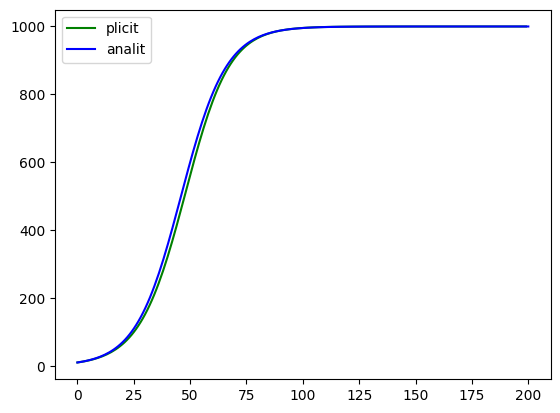

In [41]:
m = [10]

for i in range(199):
    m.append(Xplicit_Y(m[i], 1, r, K, y0[0]))

# print(m)

plt.plot(m, 'g', label='plicit')
plt.plot(t, analit, 'b', label='analit')
plt.legend()
plt.show()

In [43]:
analit_arr = [analit[i] for i in range(199)]
# analit

In [44]:
abs_delta_y = max(abs(sol[:, 0] - analit))
relativ_delta_y = max(abs(sol[:, 0] - analit)/analit)

In [45]:
print(f'abs_delta_y = {abs_delta_y} \nrelative_delta_y = {relativ_delta_y}')

abs_delta_y = 4.167796487308806e-05 
relative_delta_y = 5.035263893213719e-08
